In [1]:
import numpy as np
import cv2 as cv
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from apt.quadtree import FixedQuadTree

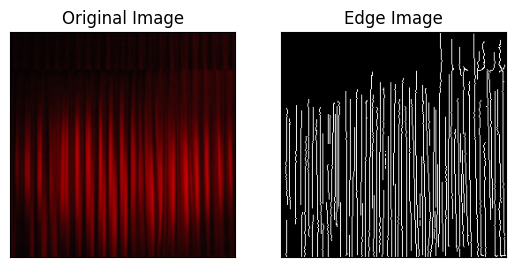

In [32]:
# img = cv.imread('/Users/zhangenzhi/work/gvit-1/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_image_0_512x512.png')
# img = cv.imread('/Volumes/data/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_image_0_512x512.png')
# img = cv.imread('/Volumes/data/dataset/miccai/rescale-images-16384/rescaled_image_0_16384x16384.png')
img = cv.imread('/Volumes/data/dataset/test/n04525038_35823.JPEG')
# img = cv.imread('/Volumes/Extreme/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_image_0_512x512.png')

img = cv.resize(img, (256,256))
img = img[..., ::-1]
grey_img = cv.GaussianBlur(img, (3,3), 0)
# grey_img = img
edges = cv.Canny(grey_img, 50, 110)

plt.subplot(121),plt.imshow(grey_img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

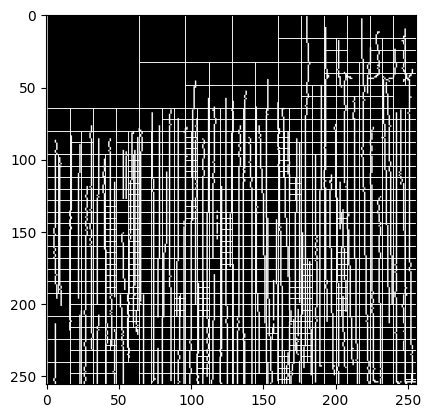

1024


In [33]:
fig, ax = plt.subplots()
ax.imshow(edges, cmap = 'gray')
qdt = FixedQuadTree(domain=edges, fixed_length=1024)
qdt.draw(ax=ax)
plt.show()
print(qdt.count_patches())
plt.close()

In [34]:
qdt.encode_nodes()

[[0, 16, 240, 256],
 [16, 24, 248, 256],
 [24, 32, 248, 256],
 [16, 24, 240, 248],
 [24, 32, 240, 248],
 [0, 16, 224, 240],
 [16, 24, 232, 240],
 [24, 32, 232, 240],
 [16, 24, 224, 232],
 [24, 32, 224, 232],
 [32, 40, 248, 256],
 [40, 48, 248, 256],
 [32, 40, 240, 248],
 [40, 48, 240, 248],
 [48, 64, 240, 256],
 [32, 40, 232, 240],
 [40, 48, 232, 240],
 [32, 40, 224, 232],
 [40, 44, 228, 232],
 [44, 48, 228, 232],
 [40, 44, 224, 228],
 [44, 48, 224, 228],
 [48, 56, 232, 240],
 [56, 64, 232, 240],
 [48, 56, 224, 232],
 [56, 64, 224, 232],
 [0, 16, 208, 224],
 [16, 24, 216, 224],
 [24, 32, 216, 224],
 [16, 24, 208, 216],
 [24, 32, 208, 216],
 [0, 16, 192, 208],
 [16, 24, 200, 208],
 [24, 32, 200, 208],
 [16, 24, 192, 200],
 [24, 32, 192, 200],
 [32, 40, 216, 224],
 [40, 48, 216, 224],
 [32, 40, 208, 216],
 [40, 48, 208, 216],
 [48, 56, 216, 224],
 [56, 64, 216, 224],
 [48, 56, 208, 216],
 [56, 60, 212, 216],
 [60, 64, 212, 216],
 [56, 60, 208, 212],
 [60, 64, 208, 212],
 [32, 40, 200, 20

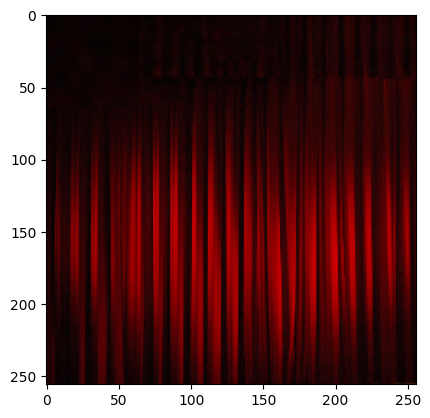

In [35]:
def patchify(mask, patch_size=8, channel=3):
    seq = qdt.serialize(mask, size=(patch_size,patch_size,channel))
    return seq

def depatchify(seq, patch_size=8, channel=3):
    # mask = np.zeros(shape=(512, 512, 3))
    mask = qdt.deserialize(seq, patch_size=patch_size, channel=channel)
    return mask

mask=img
seq = patchify(mask=mask)

fig, ax = plt.subplots()
mask= depatchify(seq=np.asarray(seq))
mask = mask.astype(np.uint8)
ax.imshow(mask, cmap = 'gray')
plt.show()
plt.close()

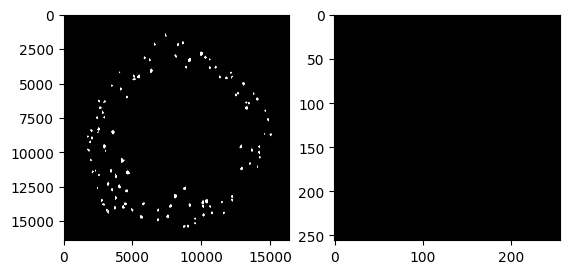

In [25]:
# mask = cv.imread('/Volumes/Extreme/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_mask_0_512x512.png')
mask = cv.imread('/Volumes/data/dataset/miccai/rescale-masks-16384/rescaled_image_0_16384x16384.png')
# mask = cv.imread('/Volumes/data/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_mask_0_512x512.png')
# mask = cv.resize(mask, (512, 512))

seq = patchify(mask=mask, patch_size=8, channel=3)

plt.subplot(121)
plt.imshow(mask)
mask= depatchify(seq=seq, patch_size=8, channel=3)
mask = mask.astype(int)
plt.subplot(122)
plt.imshow(mask)
ax.imshow(mask, cmap = 'gray')
plt.show()
plt.close()
